In [46]:
import os
import sys
import operator
import cv2
import numpy as np 
import pandas as pd
from skimage import feature
from skimage.restoration import estimate_sigma
from matplotlib import image as mpimg
from skimage import feature
from skimage.restoration import estimate_sigma
from matplotlib import image as mpimg
from PIL import Image as IMG
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
images_path = 'D:\\DataScience\\Image Classification\\all\\train\\'
imgs = os.listdir(images_path)

In [49]:
features = pd.DataFrame()
features['image'] = imgs

In [50]:
features.head()

,image
0,cat.0.jpg
1,cat.1.jpg
2,cat.10.jpg
3,cat.100.jpg
4,cat.1000.jpg


In [57]:
## Function to display image ##
def read_display_image(image_name,image_path):
    path = image_path + image_name
    img = cv2.imread(path)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h,w = RGB_img.shape[:2]
    print(RGB_img.shape)
    plt.imshow(RGB_img)
    plt.show()

In [66]:
## Display Image Sample##
sample_image = features['image'][100]
sample_image

'cat.10087.jpg'

(299, 350, 3)


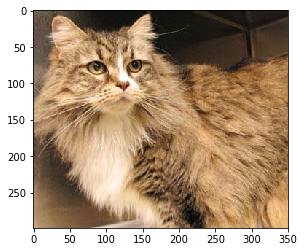

In [67]:
read_display_image(sample_image,images_path)

In [134]:
## Function to Blur and Save Image ##
def display_blurred_image(image_name,image_path):
    path = image_path + image_name
    img = cv2.imread(path)
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    blur = cv2.blur(RGB_img,(2,2))
    blur_save = "Blur-" + image_name
    cv2.imwrite(blur_save, cv2.cvtColor(blur, cv2.COLOR_RGB2BGR))
    plt.imshow(blur)
    plt.show()

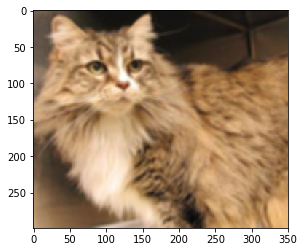

In [82]:
display_blurred_image(sample_image,images_path)

### 1 Functions to return noise, blur and uniformity per image

#### Function to estimate blurriness

In [92]:
## Higher the value, more sharper the image (Higher is better)
def estimate_blurriness(image_name,image_path):
    path = image_path + image_name
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm

In [93]:
### Test Function ###

In [94]:
sample_image = 'cat.10087.jpg'
sample_blur_image = 'Blur-cat.10087.jpg'

In [95]:
estimate_blurriness(sample_image,images_path)

817.4937140210047

In [96]:
estimate_blurriness(sample_blur_image,images_path)

23.752169372255118

#### Function to estimate uniformity (APW)

In [ ]:
### In ApW - represents no of edges in the image. Higher APW implies more edges, more features. Lower APW, implies less edges, less features. (Higher is better) 

In [106]:
def estimate_uniformity(image_name,image_path):
    path = image_path + image_name
    im = IMG.open(path)    
    im_array = np.asarray(im.convert(mode='L'))
    edges_sigma1 = feature.canny(im_array, sigma=3)
    apw = (float(np.sum(edges_sigma1)) / (im.size[0]*im.size[1]))
    return apw

In [107]:
estimate_uniformity(sample_image,images_path)

C:\Users\Sudarshan\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


0.0421595795508839

In [108]:
estimate_uniformity(sample_blur_image,images_path)

C:\Users\Sudarshan\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


0.03229813664596273

#### Function estimate noise

In [109]:
def estimate_noise(image_name,image_path):
    path = image_path + image_name
    image = cv2.imread(path)
    return estimate_sigma(image, multichannel=True, average_sigmas=True)

In [110]:
estimate_noise(sample_image,images_path)

1.7809837615855166

In [111]:
estimate_noise(sample_blur_image,images_path)

0.467154234262061

#### 2 Compute Metrics for all images and find the quartile values of metrics

In [120]:
for iter,x in features.iterrows():
        x['blur_score'] = estimate_blurriness(x['image'],images_path)

In [125]:
features['blur_score'] = features.apply(lambda row: estimate_blurriness(row['image'], images_path), axis=1)

In [127]:
features['apw_score'] = features.apply(lambda row: estimate_uniformity(row['image'], images_path), axis=1)

C:\Users\Sudarshan\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


In [128]:
features['noise_score'] = features.apply(lambda row: estimate_noise(row['image'], images_path), axis=1)

In [129]:
features.head()

,image,blur_score,apw_score,noise_score
0,cat.0.jpg,16.074069,0.012781,0.205719
1,cat.1.jpg,2378.502602,0.025464,1.953438
2,cat.10.jpg,152.069171,0.029982,0.726372
3,cat.100.jpg,235.279320,0.024739,0.722016
4,cat.1000.jpg,2901.159609,0.064072,1.836106


In [130]:
features.to_csv("Features_CSV.csv")

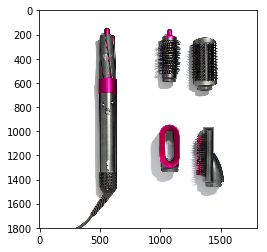

In [135]:
display_blurred_image('dyson-airwrap.jpg',images_path)